## Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
from google.colab import drive


## Google Drive set-up

In [23]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
image_folder = '/content/drive/MyDrive/bulksplash-images'

## Assign Lighting Score

In [25]:
def calc_weighted_sum(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l = lab[:, :, 0].astype(np.float32)/255
    perception = l.mean()
    shadow     = (l < 0.15).mean() #the avg l-values of the number of pixels w/l value < 15%
    highlight  = (l > 0.85).mean() #the avg l-values of the number of pixels w/l value > 85%
    score = perception - shadow + highlight #-1(dark) ---- 1(bright)
    indication = ""
    if score > 0.75:
        indication = "Very Bright"
    elif score > 0.35:
        indication = "Bright"
    elif score > 0:
        indication = "Medium"
    elif score > -0.35:
        indication = "Dark"
    else:
        indication = "Very dark"
    return perception, shadow, highlight, score, indication



## Next: Create CSV file to include all images and their *scores*

Writing lighting values of each file to a dictionary

In [26]:
import csv
data = [] #to-be a dictionary containing info to store in csv
def write_dict(filename):
      img = cv2.imread(os.path.join(image_folder, filename)) #reads the image from filename
      if img is not None:
        size = img.shape #(px, px, color channel)
        perception, shadow, highlight, score, indication = calc_weighted_sum(img)
        data.append(
            {'Filename': filename, 'Size': size, 'Perception': perception, 'Shadow': shadow, 'Highlight': highlight, 'Score': score, 'Indication': indication}
        )
      else:
        print(f"Warning: Could not read image file: {filename}")
      return data
for filename in os.listdir(image_folder): #iterates through each file in the drive folder
  write_dict(filename)


Creating the CSV File and Displaying some of the Images

             Filename              Size  Perception    Shadow     Highlight     Score   Indication
0   bulksplash-30.jpg   (4847, 3878, 3)    0.337334  0.144219  7.274891e-02  0.265864       Medium
1   bulksplash-16.jpg   (5726, 3817, 3)    0.817370  0.002880  5.548685e-01  1.369358  Very Bright
2   bulksplash-19.jpg   (5515, 4000, 3)    0.085112  0.827296  3.150091e-03 -0.739034    Very dark
3    bulksplash-9.jpg   (4032, 3024, 3)    0.421826  0.079336  4.871740e-05  0.342538       Medium
4   bulksplash-24.jpg   (4740, 2898, 3)    0.192128  0.594185  7.279864e-08 -0.402057    Very dark
5    bulksplash-6.jpg   (5184, 3456, 3)    0.693139  0.079031  4.412165e-01  1.055324  Very Bright
6   bulksplash-25.jpg   (4256, 2832, 3)    0.360527  0.173499  9.723395e-03  0.196752       Medium
7   bulksplash-22.jpg   (2784, 1856, 3)    0.397502  0.200813  6.818133e-03  0.203507       Medium
8   bulksplash-13.jpg   (6000, 4000, 3)    0.221022  0.470649  1.098750e-04 -0.249517         Dark
9   bulksp

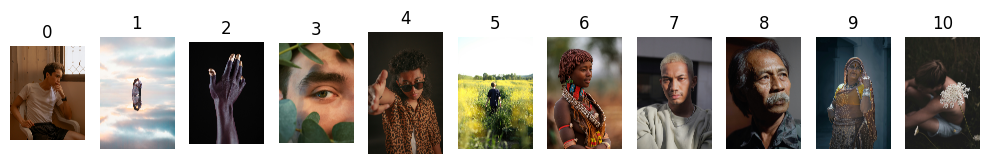

In [27]:
with open('image-lightings.csv', 'w', newline='') as csvfile: #new csv file
    fieldnames = ['Filename', 'Size', 'Perception', 'Shadow', 'Highlight', 'Score', 'Indication'] #columns
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

df = pd.read_csv('image-lightings.csv')
print(df.to_string()) #prints the csv file

# Get the list of image filenames from the folder
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Select the first 10 image filenames
images_to_plot = image_files[0:11]

# Create subplots based on the number of images to plot
# Using a single row and multiple columns for better visualization of landscape images
num_images = len(images_to_plot)
fig, axes = plt.subplots(1, num_images, figsize=(10, 10)) # Increased figsize for better display

# If there's only one image, axes is not an array, handle this case
if num_images == 1:
    axes = [axes]

for i in range(num_images):
  img_path = os.path.join(image_folder, images_to_plot[i])
  img = cv2.imread(img_path)
  if img is not None:
      # OpenCV reads images in BGR, matplotlib expects RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      axes[i].imshow(img)
      axes[i].set_title(i)   #shows labels on top of images
      axes[i].axis('off')
  else:
      print(f"Could not read image file: {images_to_plot[i]}")

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()